In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from wordcloud import WordCloud

from src.processing import process_text

In [2]:
tqdm.pandas()

In [5]:
topics = pd.read_csv("../data/vk_posts.csv")

In [6]:
topics.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [7]:
topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38740 entries, 0 to 38739
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   oid       38740 non-null  int64 
 1   category  38740 non-null  object
 2   text      38740 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.1+ KB


In [8]:
topics.isna().agg(["count", "sum", "mean"]).round(4).T

,count,sum,mean
oid,38740.0,0.0,0.0
category,38740.0,0.0,0.0
text,38740.0,0.0,0.0


In [ ]:
df = topics[["text", "category"]].copy()

In [10]:
df['text'] = df['text'].progress_apply(process_text)

  0%|          | 0/38740 [00:00<?, ?it/s]

In [11]:
def plot_category_freq(data: pd.DataFrame, cat: str) -> None:
    plt.figure(figsize=(18,6))
    g = sns.countplot(data=data, x=data[cat], order=data[cat].value_counts().index)
    g.set_title('Частотность записей по категориям')
    g.set(xticklabels=[])
    g.set(xlabel=None);

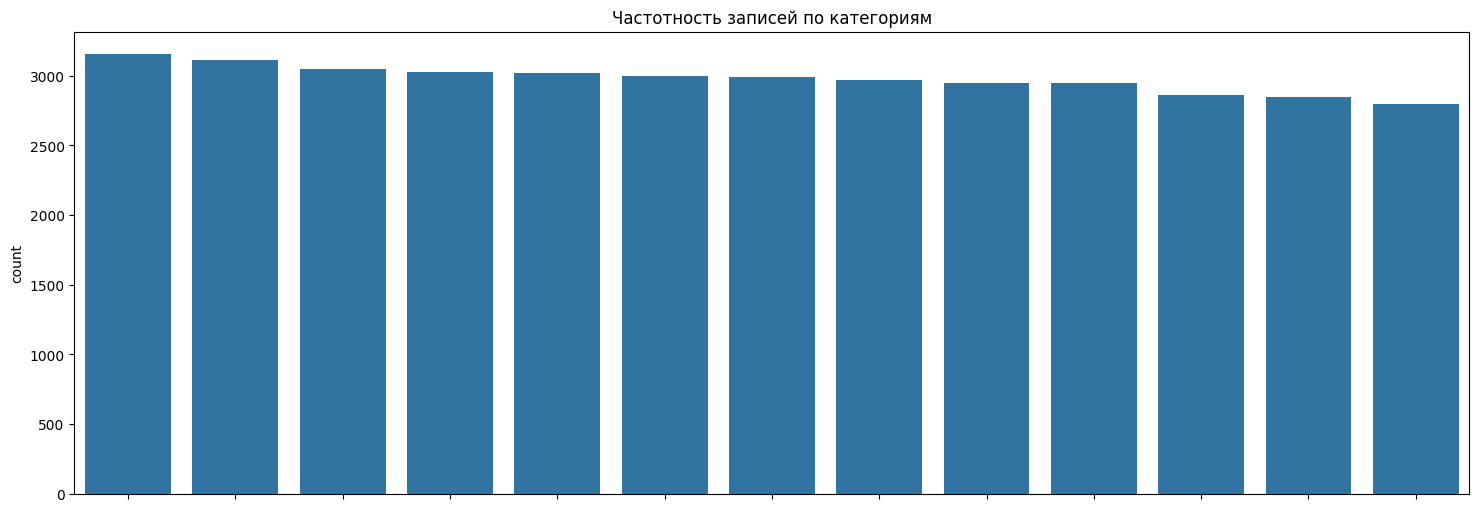

In [12]:
plot_category_freq(df, "category")

In [16]:
df["category"].value_counts()

category
autosport       3160
extreme         3110
martial_arts    3050
motosport       3030
boardgames      3020
tennis          3000
esport          2990
athletics       2970
hockey          2950
volleyball      2950
football        2860
basketball      2850
winter_sport    2800
Name: count, dtype: int64

In [23]:
def plot_wc(df: pd.DataFrame, category: str) -> None:
    
    df = df[df["category"] == category]
    text = " ".join(df.text.tolist())

    # Построение облака слов
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Отображение облака слов
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

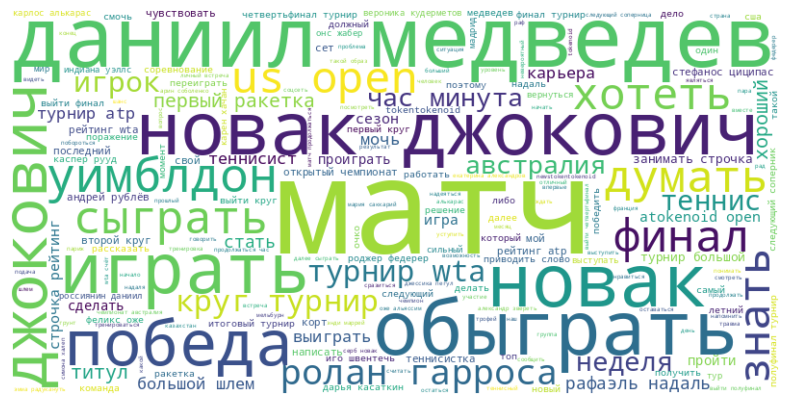

In [24]:
plot_wc(df, "tennis")

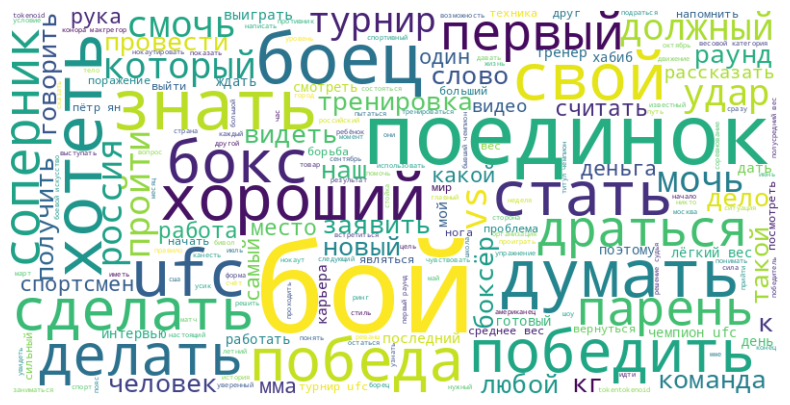

In [25]:
plot_wc(df, "martial_arts")

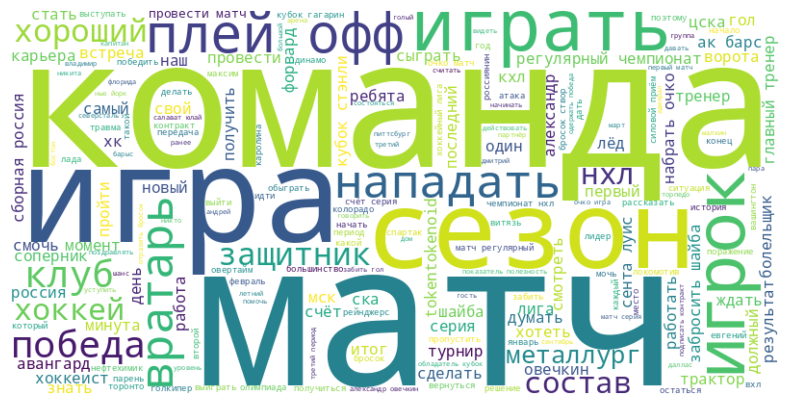

In [26]:
plot_wc(df, "hockey")

In [18]:
df.to_csv("../data/dataset.csv", index=False)